In [2]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [3]:
def readCSV():
    data = pd.read_csv('/kaggle/input/diabetes-dataset-by-age-standardized-countries/Diabetes Dataset By Age Standardized Countries.csv')
    #data = pd.read_csv('Diabetes Dataset By Age Standardized Countries.csv')
    return data 

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

'''def GetYear(Arr:np.ndarray):
    year = []
    month = []
    day = []
    for x in Arr:
        year.append(datetime.strptime(x, '%d-%m-%Y').year)
        month.append(datetime.strptime(x,'%d-%m-%Y').month)
        day.append(datetime.strptime(x,'%d-%m-%Y').day)

    return (day,month,year)

def performAnalysis(data:pd.DataFrame):
    #print(data.head())
    data = data.drop(['id'], axis=1)
    #lets see if there is a  relation between reading time and number of claps
    #first see if there is any NAN or not in those two columns
    #print(data.columns)
    for column in data.columns:
        print("{} , {}".format(column , sum(data[column].isna())))
    #print(np.where(data['claps'].isna()==True)[0])
    data = data.drop(np.where(data['claps'].isna()==True)[0] , axis=0 , inplace=False)
    print(data.describe())
    #print(data)
    subset = data[['claps','responses','reading_time']]
    #print(type(data['date'][0]))
    #print(subset.skew())    
    date_Arr = data['date']
    day , month ,year_Arr  = GetYear(date_Arr)
    data['year'] = year_Arr
    data['day'] = day
    data['month']=month
    corrMat = subset.corr()
    sns.heatmap(corrMat)
    plt.show()
    return data '''


'def GetYear(Arr:np.ndarray):\n    year = []\n    month = []\n    day = []\n    for x in Arr:\n        year.append(datetime.strptime(x, \'%d-%m-%Y\').year)\n        month.append(datetime.strptime(x,\'%d-%m-%Y\').month)\n        day.append(datetime.strptime(x,\'%d-%m-%Y\').day)\n\n    return (day,month,year)\n\ndef performAnalysis(data:pd.DataFrame):\n    #print(data.head())\n    data = data.drop([\'id\'], axis=1)\n    #lets see if there is a  relation between reading time and number of claps\n    #first see if there is any NAN or not in those two columns\n    #print(data.columns)\n    for column in data.columns:\n        print("{} , {}".format(column , sum(data[column].isna())))\n    #print(np.where(data[\'claps\'].isna()==True)[0])\n    data = data.drop(np.where(data[\'claps\'].isna()==True)[0] , axis=0 , inplace=False)\n    print(data.describe())\n    #print(data)\n    subset = data[[\'claps\',\'responses\',\'reading_time\']]\n    #print(type(data[\'date\'][0]))\n    #print(subset.sk

In [4]:

data = readCSV()
print(data.columns)
print(data.isnull().sum())
'''data = performAnalysis(data)
data.drop(['date'],axis=1)'''





Index(['Country/Region/World', 'ISO', 'Sex', 'Year',
       'Age-standardised diabetes prevalence',
       'Lower 95% uncertainty interval', 'Upper 95% uncertainty interval'],
      dtype='object')
Country/Region/World                    0
ISO                                     0
Sex                                     0
Year                                    0
Age-standardised diabetes prevalence    0
Lower 95% uncertainty interval          0
Upper 95% uncertainty interval          0
dtype: int64


"data = performAnalysis(data)\ndata.drop(['date'],axis=1)"

That means that the data is complete and we can directly move to further explore the data.

In [5]:
import plotly.express as px
country_data = data.groupby(['ISO'])['Upper 95% uncertainty interval'].mean().reset_index()
print(country_data)



fig = px.choropleth(country_data, locations="ISO",
                    color="Upper 95% uncertainty interval", # lifeExp is a column of gapminder
                    hover_name="ISO", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

     ISO  Upper 95% uncertainty interval
0    AFG                        0.121418
1    AGO                        0.092200
2    ALB                        0.100452
3    AND                        0.106298
4    ARE                        0.170146
..   ...                             ...
195  WSM                        0.219342
196  YEM                        0.105277
197  ZAF                        0.128322
198  ZMB                        0.082345
199  ZWE                        0.091979

[200 rows x 2 columns]


In [7]:
import plotly.express as px
country_data = data.groupby(['ISO'])['Lower 95% uncertainty interval'].mean().reset_index()
print(country_data)



fig = px.choropleth(country_data, locations="ISO",
                    color="Lower 95% uncertainty interval", # lifeExp is a column of gapminder
                    hover_name="ISO", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

     ISO  Lower 95% uncertainty interval
0    AFG                        0.048202
1    AGO                        0.024927
2    ALB                        0.031626
3    AND                        0.043173
4    ARE                        0.079062
..   ...                             ...
195  WSM                        0.101055
196  YEM                        0.035808
197  ZAF                        0.047908
198  ZMB                        0.027186
199  ZWE                        0.029599

[200 rows x 2 columns]


In [8]:
print(data.describe())

               Year  Age-standardised diabetes prevalence   
count  14000.000000                          14000.000000  \
mean    1997.000000                              0.075125   
std       10.099866                              0.042190   
min     1980.000000                              0.010075   
25%     1988.000000                              0.050328   
50%     1997.000000                              0.064552   
75%     2006.000000                              0.085271   
max     2014.000000                              0.328625   

       Lower 95% uncertainty interval  Upper 95% uncertainty interval  
count                    14000.000000                    14000.000000  
mean                         0.044986                        0.115953  
std                          0.031686                        0.054215  
min                          0.001764                        0.029001  
25%                          0.026392                        0.082562  
50%               

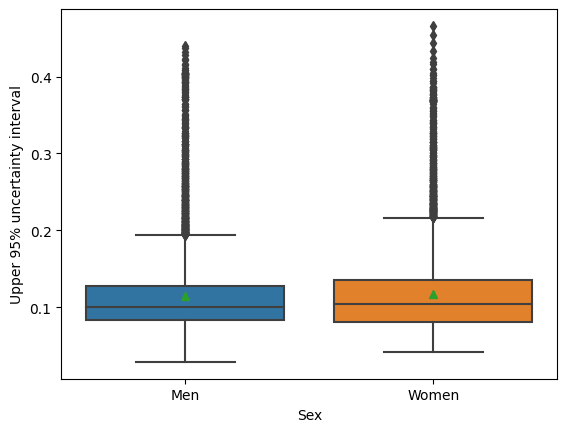

In [13]:
sns.boxplot(data=data , x = 'Sex' , y = 'Upper 95% uncertainty interval' , showmeans=True)
plt.show()

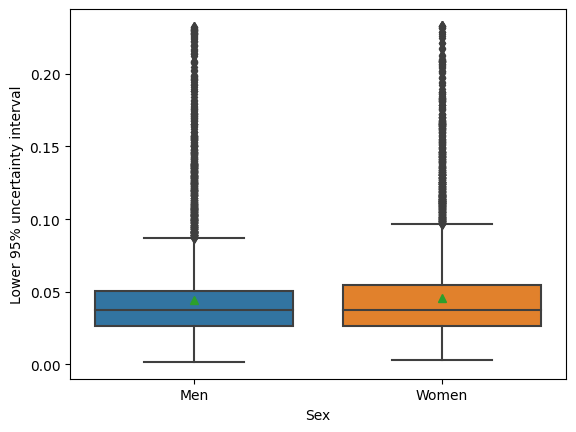

In [14]:
sns.boxplot(data=data , x = 'Sex' , y = 'Lower 95% uncertainty interval' , showmeans=True)
plt.show()

This means that generally women has higher uncertanity interval in comparision to men.

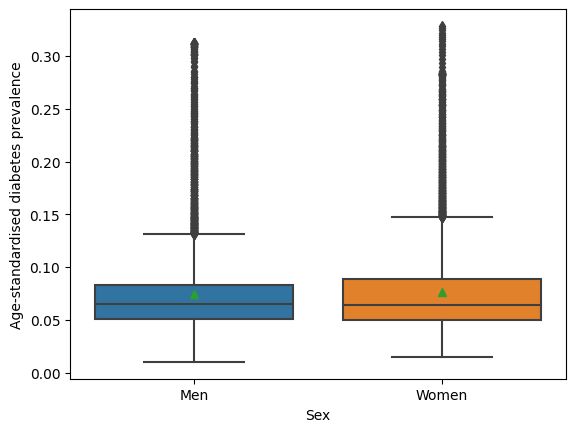

In [15]:

sns.boxplot(data=data , x = 'Sex' , y = 'Age-standardised diabetes prevalence' , showmeans=True)
plt.show()

It looks like that distribution for men and women is more or less similar except women has larger IQR i.e. that in for some countries at some point of time women had higher spread than men. Lets look at the country wise distribution of prevalence for women

In [26]:
dataWomen = data[data['Sex']=='Women']
dataWomen  = data.groupby(['ISO' , 'Country/Region/World'])['Age-standardised diabetes prevalence'].mean().reset_index()
print(dataWomen.columns)

fig = px.choropleth(data_frame=dataWomen,locations='ISO',color='Age-standardised diabetes prevalence',hover_name="Country/Region/World", # column to add to hover information
color_continuous_scale=px.colors.sequential.Greens)
fig.show()



Index(['ISO', 'Country/Region/World', 'Age-standardised diabetes prevalence'], dtype='object')


In [36]:
dataMen = data[data['Sex']=='Men']
dataMen  = data.groupby(['ISO' , 'Country/Region/World'])['Age-standardised diabetes prevalence'].mean().reset_index()
print(dataMen.columns)

fig1 = px.choropleth(data_frame=dataMen,locations='ISO',color='Age-standardised diabetes prevalence',hover_name="Country/Region/World", # column to add to hover information
color_continuous_scale=px.colors.sequential.Greens_r)
fig1.show()



Index(['ISO', 'Country/Region/World', 'Age-standardised diabetes prevalence'], dtype='object')


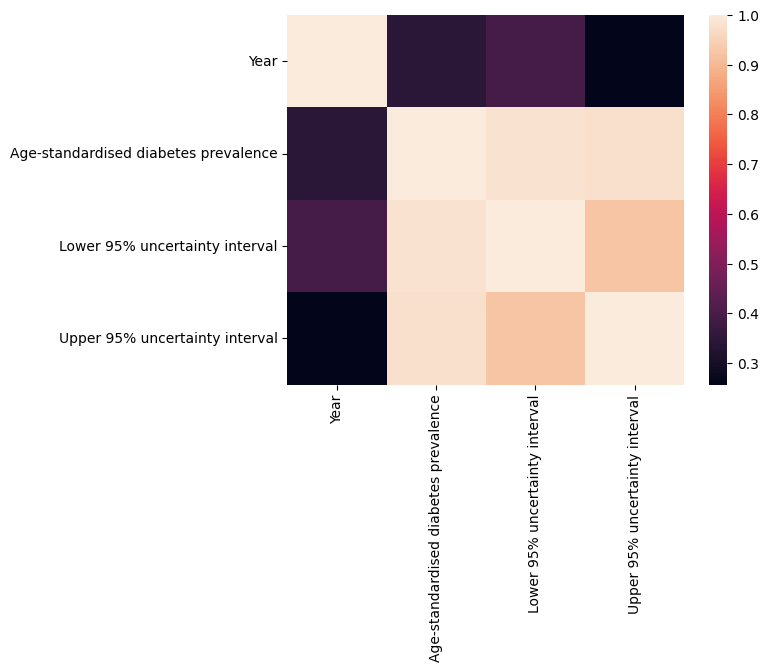

In [38]:
corr = data[["Year","Age-standardised diabetes prevalence","Lower 95% uncertainty interval","Upper 95% uncertainty interval"]].corr()
sns.heatmap(corr)
plt.show()

It looks like there is almost no relation between years and dibetese spread. i.e. dibetese spread is not get effected even when all the factors influencing dibetese are increasing year by year.

There seems to be a string correlation amongs factors like "Age-standardised diabetes prevalence","Lower 95% uncertainty interval","Upper 95% uncertainty interval"


lets look at the decade wise infuence on dibetes.